In [1]:
import torch
import matplotlib.pyplot as plt
from common import *
import time
import copy
import gym

import xarray as xr
import numpy as np

import os
import matplotlib

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


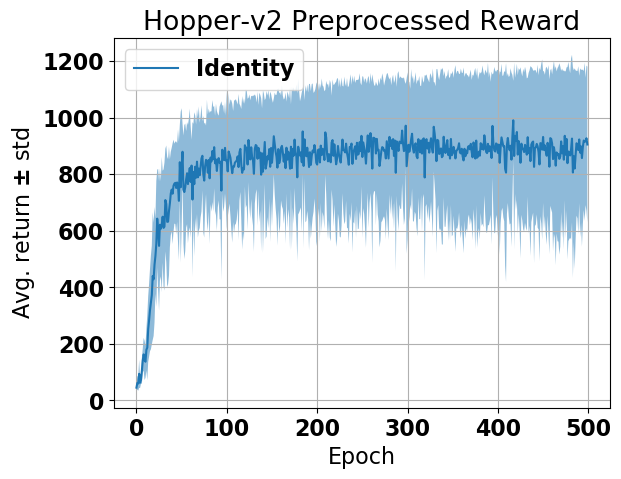

<Figure size 640x480 with 0 Axes>

In [2]:
matplotlib.style.use('default')

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

save_dir = "./data_hop_ramp0"
env_names = list(os.walk(save_dir))[0][1]

agent_dict = {}

for env_name in env_names:
    data = torch.load(f"{save_dir}/{env_name}/data.xr")
    data = data.where(data.post!='radodiv', drop=True)

    model_dict = data.model_dict
    rews = data.rews#/data.post_rews
    exp_names = [fn.__name__ for fn in data.attrs['post_fns']]
    num_seeds = len(model_dict[exp_names[0]])

    means = rews.mean(dim="trial")
    stds = rews.std(dim="trial")

    #plt.subplots(1,1, figsize=(10,7))
    plt.plot(means.T)
    plt.legend(['Identity', 'Variogram','Madogram'], loc='upper left')
    #plt.legend(['Mado', 'Vario'])
    ci = stds

    for mean, c in zip(means, ci):
        plt.fill_between([t for t in range(len(mean))], (mean-c), (mean+c), alpha=.5)
    plt.title(f"{env_name} Preprocessed Reward")
    plt.ylabel(r"Avg. return $\pm$ std")
    plt.xlabel(r"Epoch")
    plt.grid()
    plt.figure()
    
    agent_list = []
    
    for agent_name in os.listdir(f"{save_dir}/{env_name}"):
        if ".xr" in agent_name:
            continue
        else:
            agent_list.append(torch.load(f"{save_dir}/{env_name}/{agent_name}"))        
             
    agent_dict[env_name] = agent_list


In [4]:
env = gym.make(env_name)
model = model_dict['identity'][0]
obs, act, rew, _ = do_rollout(env, model, render=True)

Creating window glfw
You can access the simulator by self.sim
> /home/sgillen/work/external/mujoco-py/mujoco_py/mjviewer.py(347)key_callback()
    346                                     geom_idx, 3] = self.sim.extras[geom_idx]
--> 347         super().key_callback(window, key, scancode, action, mods)
    348 



ipdb>          self.viewer.cam.type = mj.generated.const.CAMERA_FREE


*** NameError: name 'mj' is not defined


ipdb>          self.viewer.cam.type = const.CAMERA_FREE


*** AttributeError: 'MjViewer' object has no attribute 'viewer'


ipdb>  self.cam.type = const.CAMERA_FREE
ipdb>  c


In [4]:
omodel.step(env.observation_space.sample())

(array([-2.6019254 , -2.47169585, -3.60054631]), None, None, None)

In [13]:
env.model.stat.extent

8.0

In [12]:
env = gym.make("HalfCheetah-v2")